In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [4]:
# Import the data set
analysis_data = pd.read_csv('analysis_data.csv')
analysis_data.head()

,Year,state,State_Pct_Telehealth,Rural_Pct_Telehealth,Urban_Pct_Telehealth,FID,fips,County Population,County Pop Per Sq Mile,Fixed Internet Subscribers,...,Number of PCPs per 100k,Number of Dentists per 100k,Number of Mental Health per 100k,Number of Adults in poor or Fair health,Rural Population,Share of Pop in Rural Area,Urban Population,Share of Pop in Urban Area,Number of Drug Related Deaths per 100k,Number of Opiod Related Deaths per 100k
0,2023,Alabama,0.0713,0.0661,0.0732,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,1,4903185,96.80,75,...,65.00,49.89,108.30,1048095,2024944,41.3,2878241,58.7,16.5,7.9
1,2023,Alaska,0.1580,0.1682,0.1465,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,2,731545,1.28,80,...,94.32,102.25,499.63,113872,262036,35.8,469509,64.2,17.1,11.5
2,2023,Arizona,0.1549,0.1526,0.1553,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,4,7278717,64.08,85,...,64.68,63.03,140.19,1355532,922084,12.7,6356633,87.3,22.5,13.9
3,2023,Arkansas,0.1070,0.0906,0.1203,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,5,3017804,57.99,67,...,66.27,47.55,236.36,702297,1342675,44.5,1675129,55.5,14.5,6.8
4,2023,California,0.2743,0.2530,0.2768,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,6,39512223,253.64,89,...,79.87,87.02,373.39,6959513,2415048,6.1,37097175,93.9,12.4,5.8


In [3]:
analysis_data.columns

Index(['Year', 'state', 'State_Pct_Telehealth', 'Rural_Pct_Telehealth',
       'Urban_Pct_Telehealth', 'FID', 'fips', 'County Population',
       'County Pop Per Sq Mile', 'Fixed Internet Subscribers',
       'Type of Residential Connection - code, need to find what it means',
       'Share of Pop with NO PROVIDERS offering servcies at minimum FCC ',
       'Number of Providers offering access to 50% + of pop',
       'Share of Pop at FCC Benchmark of Internet Access',
       'Share of Pop with access to most common download speed tier',
       'Most Common download speed tier',
       'Share of Pop with access to most common upload speed tier',
       'Most common upload speed tier',
       'Share of pop with Fixed Broadband Service FCC Minimum',
       'Share of pop with NO ACCESS To Fixed Broadband FCC Minimum',
       'Number of Dentists',
       'Preventable Hospital Stays per 100k Medicare Enrollees',
       '% Adults with Physical Inactivity', '% Adults with Excessive Drinking',

The correlation between Internet Access and Telehealth Usage is 0.47


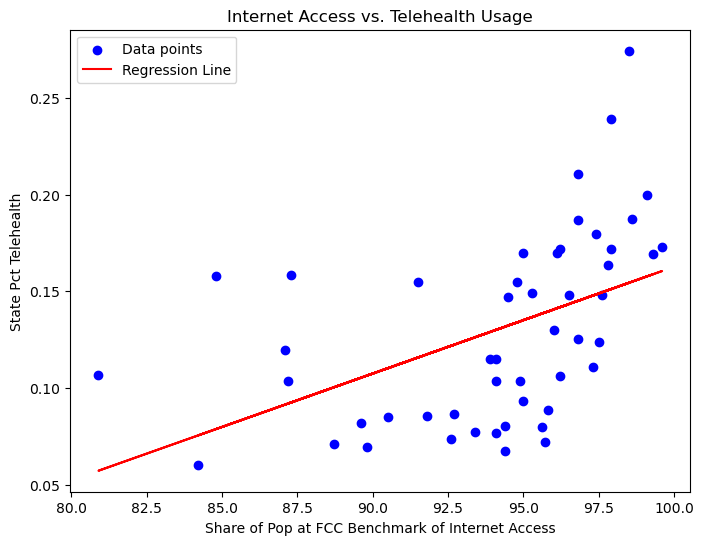

In [111]:
# Calculate the correlation coefficient and a linear regression model 
# for Internet Access and Telehealth usage for the United States

# Calculate correlation coefficient using pearsonr
correlation = st.pearsonr(analysis_data['Share of Pop at FCC Benchmark of Internet Access'], 
                          analysis_data['State_Pct_Telehealth'])

print(f'The correlation between Internet Access and Telehealth Usage is {round(correlation[0], 2)}')

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    analysis_data['Share of Pop at FCC Benchmark of Internet Access'], 
    analysis_data['State_Pct_Telehealth'])

# Plotting the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(analysis_data['Share of Pop at FCC Benchmark of Internet Access'], 
            analysis_data['State_Pct_Telehealth'], color='blue', label='Data points')
plt.plot(analysis_data['Share of Pop at FCC Benchmark of Internet Access'], 
         slope * analysis_data['Share of Pop at FCC Benchmark of Internet Access'] + intercept, 
         color='red', label='Regression Line')

plt.title('Internet Access vs. Telehealth Usage')
plt.xlabel('Share of Pop at FCC Benchmark of Internet Access')
plt.ylabel('State Pct Telehealth')
plt.legend()
plt.grid(False)
plt.show()

In [71]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations

#Generate list of columns to include in correlation dataframe:
correlation_list = ['State_Pct_Telehealth', 'Rural_Pct_Telehealth', 'Urban_Pct_Telehealth', 
                    'Share of Pop with NO PROVIDERS offering servcies at minimum FCC ',
                    'Number of Providers offering access to 50% + of pop', 
                    'Share of Pop at FCC Benchmark of Internet Access','Number of Dentists', 
                    'Preventable Hospital Stays per 100k Medicare Enrollees', 
                    '% Adults with Physical Inactivity', 
                    '% Adults with Excessive Drinking', 
                    'Number of Mental Health Providers', 
                    '% of Adults with Severe Housing Problems', 
                    '% of Adults with Some College', '% of Adults 65+', 
                    '% of Adults in Poor or Fair Health', 'Number of Primary Care Physicians', 
                    'Injury deaths per 100k', 'Years of life lost before age 75 per 100k', 'Percent Unemployed', 
                    'Percent High BMI', 'Percent with Diabetes', 'Number of PCPs per 100k', 
                    'Number of Dentists per 100k', 'Number of Mental Health per 100k', 
                    'Number of Adults in poor or Fair health', 'Rural Population', 
                    'Share of Pop in Rural Area', 'Urban Population', 'Share of Pop in Urban Area', 
                    'Number of Drug Related Deaths per 100k', 'Number of Opiod Related Deaths per 100k']

#Generate Dataframe for correlation analysis:
correlation_data = pd.DataFrame(analysis_data, columns=correlation_list)
correlation_data.head()

#Correlation Matrix:
correlations= correlation_data.corr()
correlations.columns

Index(['State_Pct_Telehealth', 'Rural_Pct_Telehealth', 'Urban_Pct_Telehealth',
       'Share of Pop with NO PROVIDERS offering servcies at minimum FCC ',
       'Number of Providers offering access to 50% + of pop',
       'Share of Pop at FCC Benchmark of Internet Access',
       'Number of Dentists',
       'Preventable Hospital Stays per 100k Medicare Enrollees',
       '% Adults with Physical Inactivity', '% Adults with Excessive Drinking',
       'Number of Mental Health Providers',
       '% of Adults with Severe Housing Problems',
       '% of Adults with Some College', '% of Adults 65+',
       '% of Adults in Poor or Fair Health',
       'Number of Primary Care Physicians', 'Injury deaths per 100k',
       'Years of life lost before age 75 per 100k', 'Percent Unemployed',
       'Percent High BMI', 'Percent with Diabetes', 'Number of PCPs per 100k',
       'Number of Dentists per 100k', 'Number of Mental Health per 100k',
       'Number of Adults in poor or Fair health', 'Rura

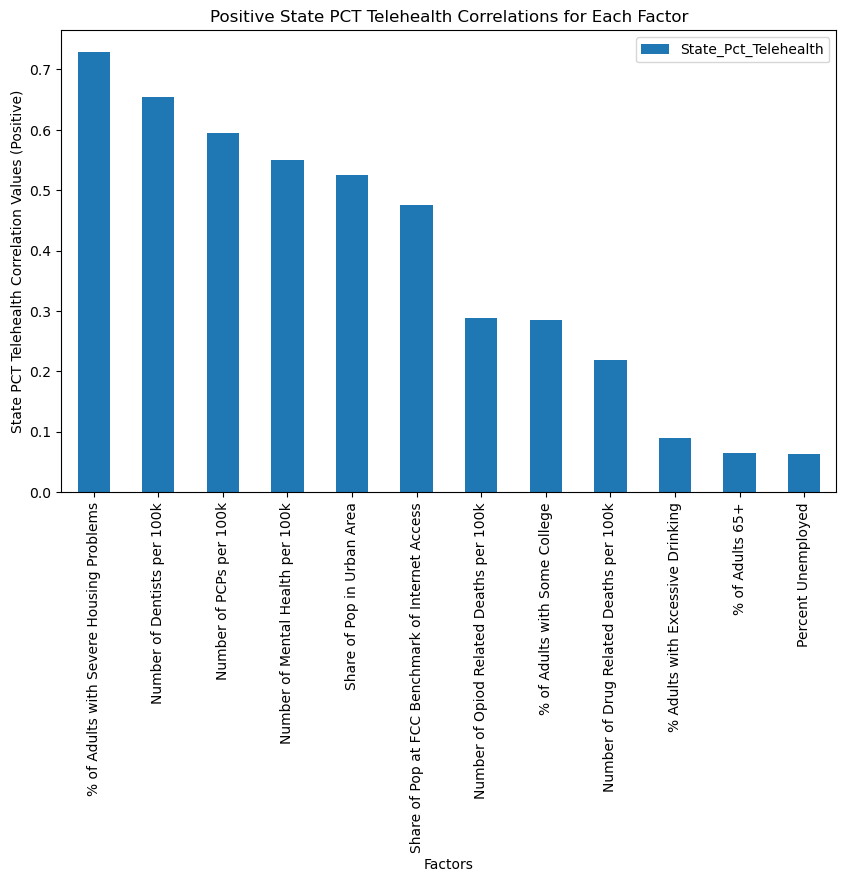

In [103]:
#Reset Index and adding it as new column:
correlations['Factors'] = correlations.index
correlations.head()

# Filter the DataFrame to include only rows where 'State_Pct_Telehealth' is positive
positive_values_df = correlations[correlations['State_Pct_Telehealth'] > 0]

#Reduce Columns down to values we want to look at
# List of columns to keep
labels_to_keep = ['% of Adults with Severe Housing Problems', 'Number of PCPs per 100k',
                'Number of Dentists per 100k', 'Number of Mental Health per 100k','Share of Pop in Urban Area',
                'Share of Pop at FCC Benchmark of Internet Access', 'Number of Opiod Related Deaths per 100k', 
                '% of Adults with Some College', 'Number of Drug Related Deaths per 100k', 
                '% Adults with Excessive Drinking', '% of Adults 65+', 'Percent Unemployed']

# Select specific columns by indexing
positive_values_df = positive_values_df.loc[labels_to_keep]

# Drop Telehealth rows
# Values to drop in 'Factors' Column
values_to_drop = ['State_Pct_Telehealth', 'Rural_Pct_Telehealth', 'Urban_Pct_Telehealth']

# Drop rows where 'ColumnA' contains values from 'values_to_drop'
positive_values_df = positive_values_df[~positive_values_df['Factors'].isin(values_to_drop)]

# Sort DataFrame by the 'Telehealth' column in descending order
positive_values_df = positive_values_df.sort_values(by='State_Pct_Telehealth', ascending=False)
positive_values_df.head()

# Plot the bar chart for positive values using Pandas
ax = positive_values_df.plot(x='Factors', y='State_Pct_Telehealth', kind='bar', figsize=(10, 6))

plt.xlabel("Factors")
plt.ylabel("State PCT Telehealth Correlation Values (Positive)")
plt.title("Positive State PCT Telehealth Correlations for Each Factor")
plt.xticks(rotation=90)

# Get the factors (x-values) and their positions
factors = positive_values_df['Factors']
x_positions = range(len(factors))

# Set xticks to display factors for each bar
ax.set_xticks(x_positions)
ax.set_xticklabels(factors)

plt.show()

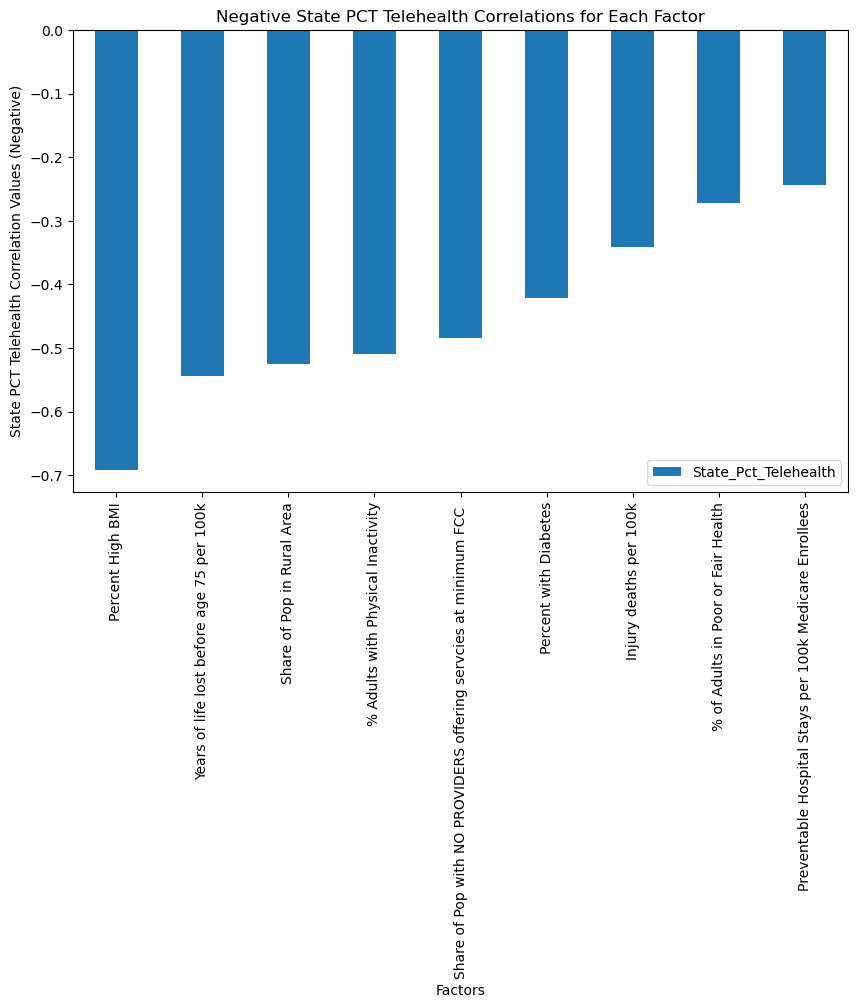

In [112]:
# Filter the DataFrame to include only rows where 'State_Pct_Telehealth' is negative
negative_values_df = correlations[correlations['State_Pct_Telehealth'] < 0]

#Reduce Columns down to values we want to look at
# List of columns to keep
labels_to_keep = ['Percent High BMI','Years of life lost before age 75 per 100k','Share of Pop in Rural Area', 
                 '% Adults with Physical Inactivity', 'Share of Pop with NO PROVIDERS offering servcies at minimum FCC ',
                 'Percent with Diabetes', 'Injury deaths per 100k', '% of Adults in Poor or Fair Health',
                 'Preventable Hospital Stays per 100k Medicare Enrollees']

# Select specific columns by indexing
negative_values_df = negative_values_df.loc[labels_to_keep]

# Drop Telehealth rows
# Values to drop in 'Factors' Column
values_to_drop = ['State_Pct_Telehealth', 'Rural_Pct_Telehealth', 'Urban_Pct_Telehealth']

# Drop rows where 'ColumnA' contains values from 'values_to_drop'
negative_values_df = negative_values_df[~negative_values_df['Factors'].isin(values_to_drop)]

# Sort DataFrame by the 'Telehealth' column in ascending order
negative_values_df = negative_values_df.sort_values(by='State_Pct_Telehealth', ascending=True)

# Plot the bar chart for positive values using Pandas
ax = negative_values_df.plot(x='Factors', y='State_Pct_Telehealth', kind='bar', figsize=(10, 6))

plt.xlabel("Factors")
plt.ylabel("State PCT Telehealth Correlation Values (Negative)")
plt.title("Negative State PCT Telehealth Correlations for Each Factor")
plt.xticks(rotation=90)

# Get the factors (x-values) and their positions
factors = negative_values_df['Factors']
x_positions = range(len(factors))

# Set xticks to display factors for each bar
ax.set_xticks(x_positions)
ax.set_xticklabels(factors)

plt.show()

In [10]:
# Sort the DataFrame by the specified column in descending order
sort_top = analysis_data.sort_values(by="Share of Pop at FCC Benchmark of Internet Access", ascending=False)

# Select the top 10 values based on the sorted DataFrame
top_10_df = sort_top.head(10)

# Set the desired column names for the new DataFrame
desired_columns = [
    'state',
    '% of Adults with Some College',
    'Percent Unemployed'
]

# Filter the DataFrame based on the desired columns
top_10 = top_10_df[desired_columns].copy()

# Set the 'state' column as the index for the top_10 DataFrame
top_10.set_index('state', inplace=True)

# Display the resulting DataFrame
top_10.head(10)

,% of Adults with Some College,Percent Unemployed
state,,
Connecticut,69.2,3.7
New Jersey,69.9,3.6
New York,68.7,4.0
Rhode Island,66.8,3.6
California,65.7,4.0
New Hampshire,70.8,2.5
Massachusetts,73.6,2.9
Delaware,61.8,3.8
Maine,68.3,3.0


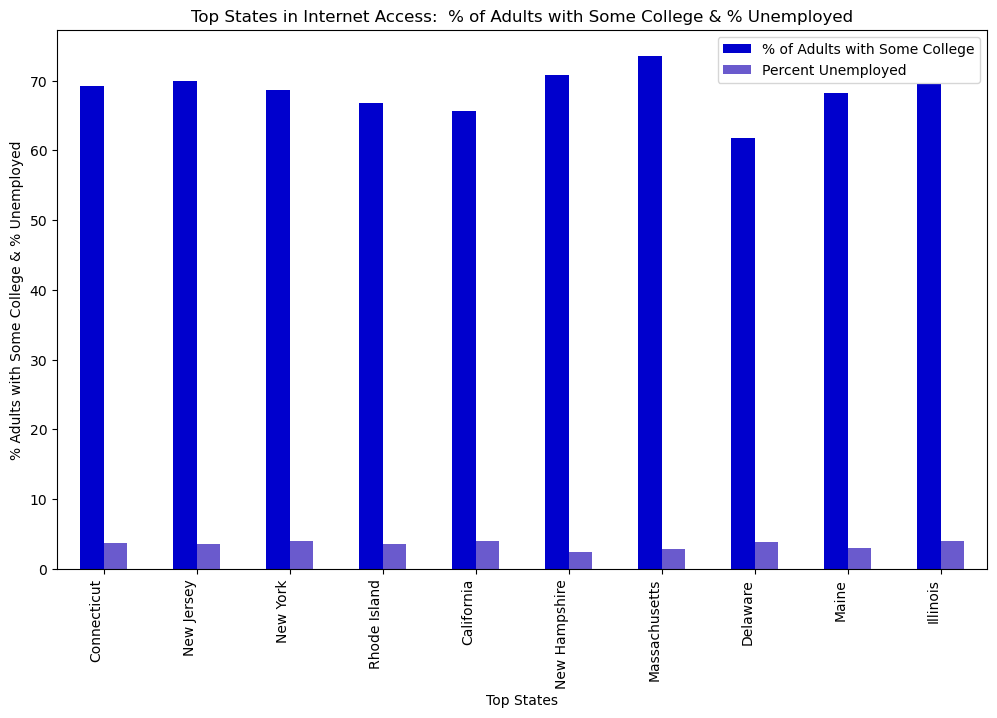

In [18]:
# Create a bar plot for the top 10 states
figure1, ax = plt.subplots(figsize=(12, 7))
top_10.plot(kind="bar", ax=ax, color=["mediumblue", "slateblue"])

# Set up titles and labels
title = "Top States in Internet Access:  % of Adults with Some College & % Unemployed"
xlabel = "Top States"
ylabel = "% Adults with Some College & % Unemployed"

# Configure x ticks
xticklabels = top_10.index
ax.set_xticklabels(xticklabels, rotation=90, ha="right")

# Set labels and title
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.set_title(title)

# Show the plot
plt.show()

In [15]:
# Sort the DataFrame by the specified column in acscending order
sort_bottom = analysis_data.sort_values(by="Share of Pop at FCC Benchmark of Internet Access", ascending=True)

# Select the top 10 values based on the sorted DataFrame
bottom_10_df = sort_bottom.head(10)

# Set the desired column names for the new DataFrame
desired_columns = [
    'state',
    '% of Adults with Some College',
    'Percent Unemployed'
]

# Filter the DataFrame based on the desired columns
bottom_10 = bottom_10_df[desired_columns].copy()

# Set the 'state' column as the index for the top_10 DataFrame
bottom_10.set_index('state', inplace=True)

# Display the resulting DataFrame
bottom_10.head(10)

,% of Adults with Some College,Percent Unemployed
state,,
Arkansas,58.5,3.5
Mississippi,59.9,5.4
Alaska,65.4,6.1
West Virginia,55.7,4.9
Oklahoma,59.5,3.3
New Mexico,60.5,4.9
Alabama,60.7,3.0
Wyoming,66.5,3.6
Louisiana,56.8,4.8


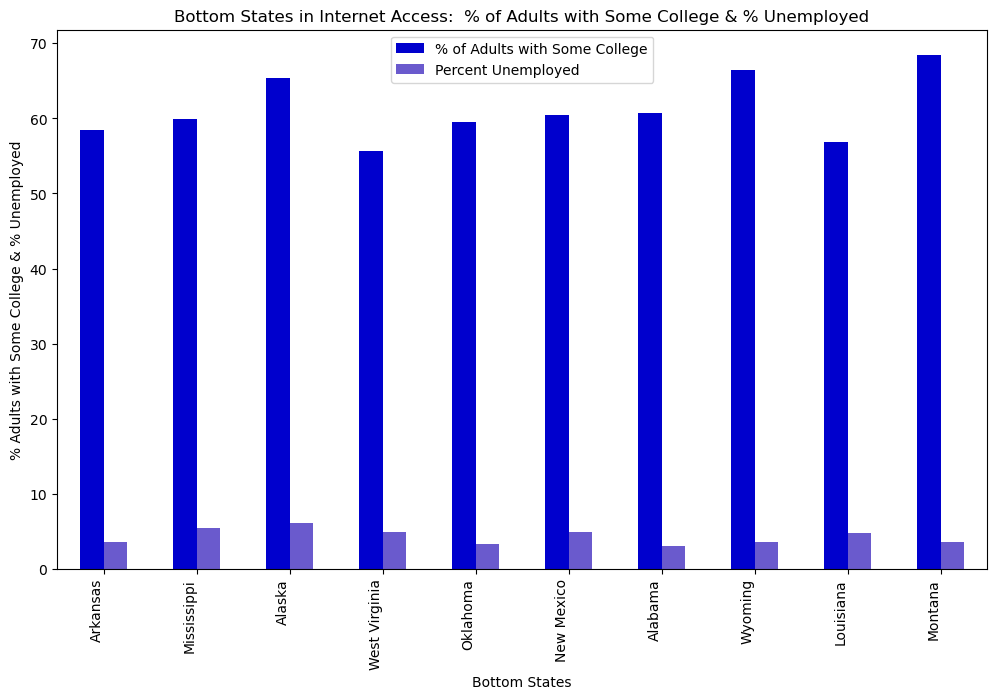

In [19]:
# Create a bar plot for the bottom 10 states
figure1, ax = plt.subplots(figsize=(12, 7))
bottom_10.plot(kind="bar", ax=ax, color=["mediumblue", "slateblue"])

# Set up titles and labels
title = "Bottom States in Internet Access:  % of Adults with Some College & % Unemployed"
xlabel = "Bottom States"
ylabel = "% Adults with Some College & % Unemployed"

# Configure x ticks
xticklabels = bottom_10.index
ax.set_xticklabels(xticklabels, rotation=90, ha="right")

# Set labels and title
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.set_title(title)

# Show the plot
plt.show()

In [44]:
# Sort the DataFrame by the specified column in descending order
sort_top2 = analysis_data.sort_values(by="Share of Pop at FCC Benchmark of Internet Access", ascending=False)

# Select the top 10 values based on the sorted DataFrame
top_10_df2 = sort_top.head(10)

# Set the desired column names for the new DataFrame
desired_columns = [
    'state',
    '% of Adults with Severe Housing Problems',
    '% of Adults 65+'
]

# Filter the DataFrame based on the desired columns
top_102 = top_10_df2[desired_columns].copy()

# Set the 'state' column as the index for the top_10 DataFrame
top_102.set_index('state', inplace=True)

# Display the resulting DataFrame
top_102.head(10)

,% of Adults with Severe Housing Problems,% of Adults 65+
state,,
Connecticut,17.8,17.7
New Jersey,21.2,16.6
New York,23.5,16.9
Rhode Island,18.0,17.7
California,26.4,14.8
New Hampshire,14.5,18.7
Massachusetts,17.5,17.0
Delaware,14.3,19.4
Maine,14.3,21.2


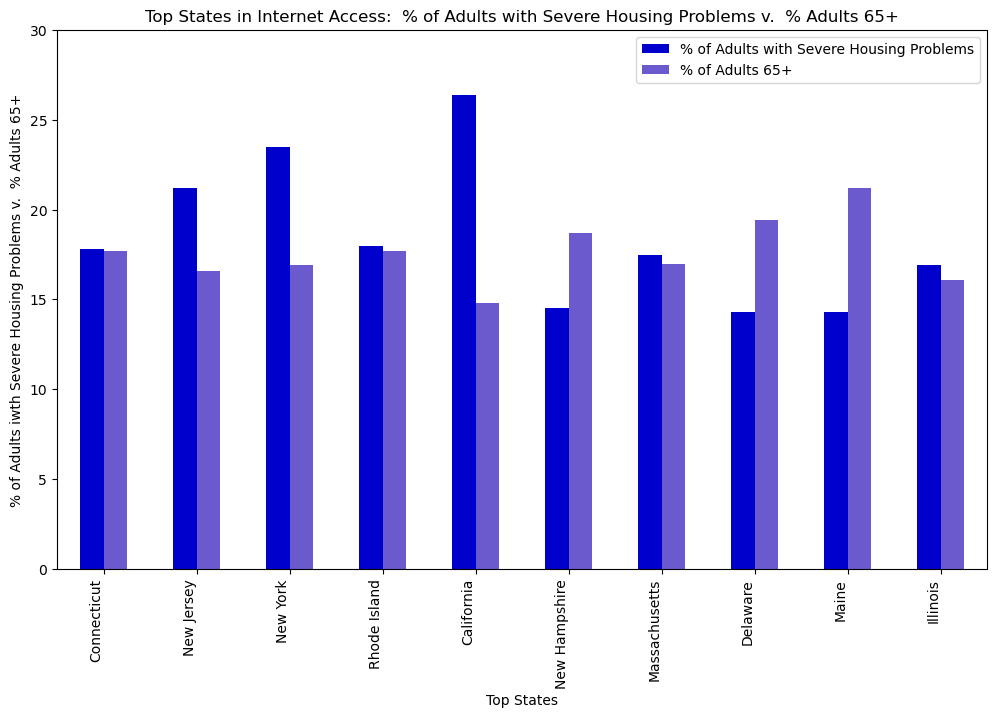

In [45]:
# Create a bar plot for the top 10 states
figure1, ax = plt.subplots(figsize=(12, 7))
top_102.plot(kind="bar", ax=ax, color=["mediumblue", "slateblue"])

# Set up titles and labels
title = "Top States in Internet Access:  % of Adults with Severe Housing Problems v.  % Adults 65+"
xlabel = "Top States"
ylabel = "% of Adults iwth Severe Housing Problems v.  % Adults 65+"

# Configure x ticks
xticklabels = top_102.index
ax.set_xticklabels(xticklabels, rotation=90, ha="right")

# Set labels and title
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.set_title(title)

# Set y-axis limit to 30
ax.set_ylim(0, 30)

# Show the plot
plt.show()

In [46]:
# Sort the DataFrame by the specified column in acscending order
sort_bottom2 = analysis_data.sort_values(by="Share of Pop at FCC Benchmark of Internet Access", ascending=True)

# Select the top 10 values based on the sorted DataFrame
bottom_10_df2 = sort_bottom2.head(10)

# Set the desired column names for the new DataFrame
desired_columns = [
    'state',
    '% of Adults with Severe Housing Problems',
    '% of Adults 65+'
]

# Filter the DataFrame based on the desired columns
bottom_102 = bottom_10_df2[desired_columns].copy()

# Set the 'state' column as the index for the top_10 DataFrame
bottom_102.set_index('state', inplace=True)

# Display the resulting DataFrame
bottom_102.head(10)

,% of Adults with Severe Housing Problems,% of Adults 65+
state,,
Arkansas,14.1,17.4
Mississippi,15.4,16.4
Alaska,20.5,12.5
West Virginia,11.2,20.5
Oklahoma,14.0,16.1
New Mexico,17.3,18.0
Alabama,13.9,17.3
Wyoming,11.9,17.1
Louisiana,15.8,15.9


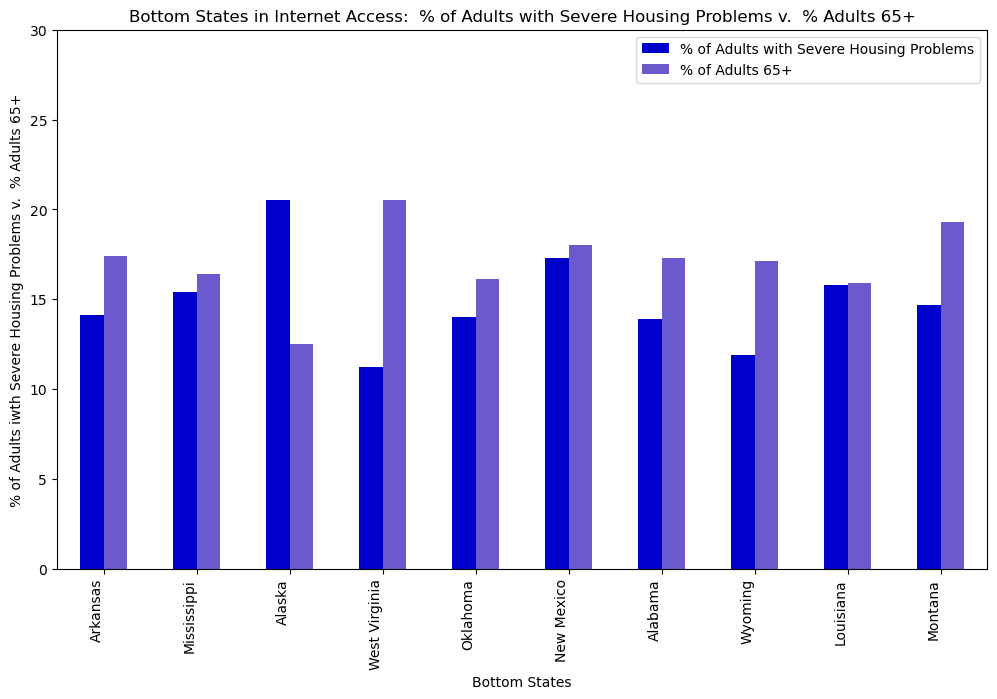

In [47]:
# Create a bar plot for the bottom 10 states
figure1, ax = plt.subplots(figsize=(12, 7))
bottom_102.plot(kind="bar", ax=ax, color=["mediumblue", "slateblue"])

# Set up titles and labels
title = "Bottom States in Internet Access:  % of Adults with Severe Housing Problems v.  % Adults 65+"
xlabel = "Bottom States"
ylabel = "% of Adults iwth Severe Housing Problems v.  % Adults 65+"

# Configure x ticks
xticklabels = bottom_102.index
ax.set_xticklabels(xticklabels, rotation=90, ha="right")

# Set labels and title
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.set_title(title)

# Set y-axis limit to 30
ax.set_ylim(0, 30)

# Show the plot
plt.show()

In [28]:
# Sort the DataFrame by the specified column in descending order
sort_top3 = analysis_data.sort_values(by="State_Pct_Telehealth", ascending=False)

# Select the top 10 values based on the sorted DataFrame
top_103_df = sort_top3.head(10)

# Set the desired column names for the new DataFrame
desired_columns = [
    'state',
    '% of Adults in Poor or Fair Health',
]

# Filter the DataFrame based on the desired columns
top_103 = top_103_df[desired_columns].copy()

# Set the 'state' column as the index for the top_10 DataFrame
top_103.set_index('state', inplace=True)

# Display the resulting DataFrame
top_103.head(10)

,% of Adults in Poor or Fair Health
state,
California,17.6
Massachusetts,13.5
Hawaii,15.4
New York,16.3
Rhode Island,16.5
Minnesota,12.9
Maryland,15.2
Connecticut,13.0
New Hampshire,12.8


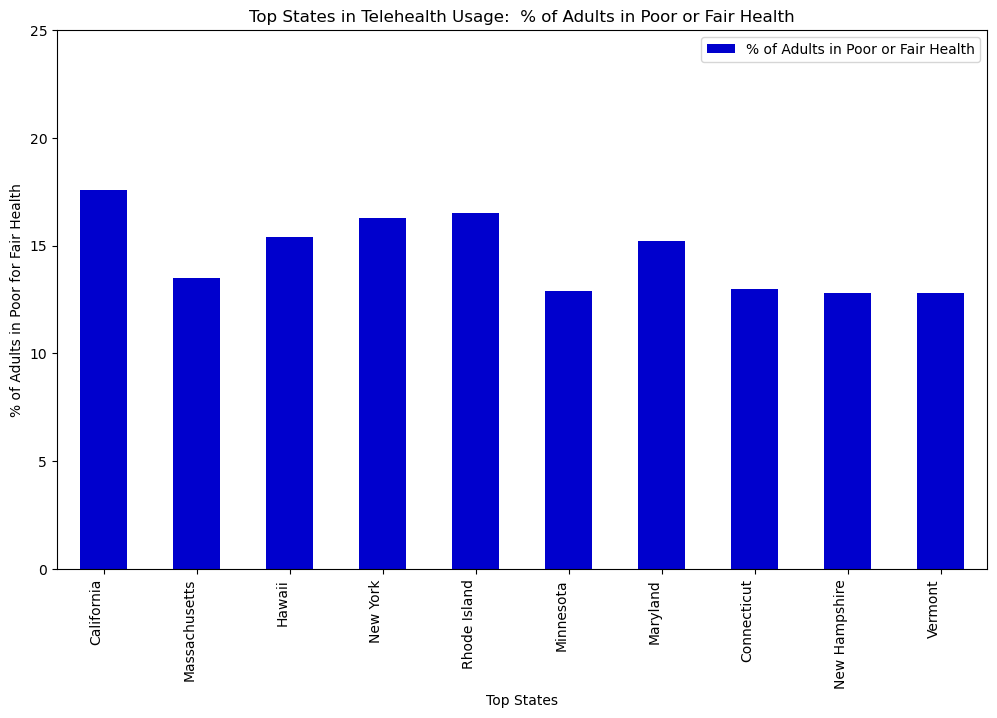

In [38]:
# Create a bar plot for the top 10 states
figure1, ax = plt.subplots(figsize=(12, 7))
top_103.plot(kind="bar", ax=ax, color=["mediumblue", "slateblue"])

# Set up titles and labels
title = "Top States in Telehealth Usage:  % of Adults in Poor or Fair Health"
xlabel = "Top States"
ylabel = "% of Adults in Poor for Fair Health"

# Configure x ticks
xticklabels = top_103.index
ax.set_xticklabels(xticklabels, rotation=90, ha="right")

# Set labels and title
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.set_title(title)

# Set y-axis limit to 25
ax.set_ylim(0, 25)

# Show the plot
plt.show()

In [32]:
# Sort the DataFrame by the specified column in acscending order
sort_bottom3 = analysis_data.sort_values(by="State_Pct_Telehealth", ascending=True)

# Select the top 10 values based on the sorted DataFrame
bottom_10_df3 = sort_bottom3.head(10)

# Set the desired column names for the new DataFrame
desired_columns = [
    'state',
   '% of Adults in Poor or Fair Health',
]

# Filter the DataFrame based on the desired columns
bottom_103 = bottom_10_df3[desired_columns].copy()

# Set the 'state' column as the index for the top_10 DataFrame
bottom_103.set_index('state', inplace=True)

# Display the resulting DataFrame
bottom_103.head(10)

,% of Adults in Poor or Fair Health
state,
Mississippi,22.1
Iowa,13.5
Louisiana,21.4
Alabama,21.4
North Dakota,13.6
Nebraska,13.8
South Dakota,13.4
Tennessee,21.2
Kansas,16.3


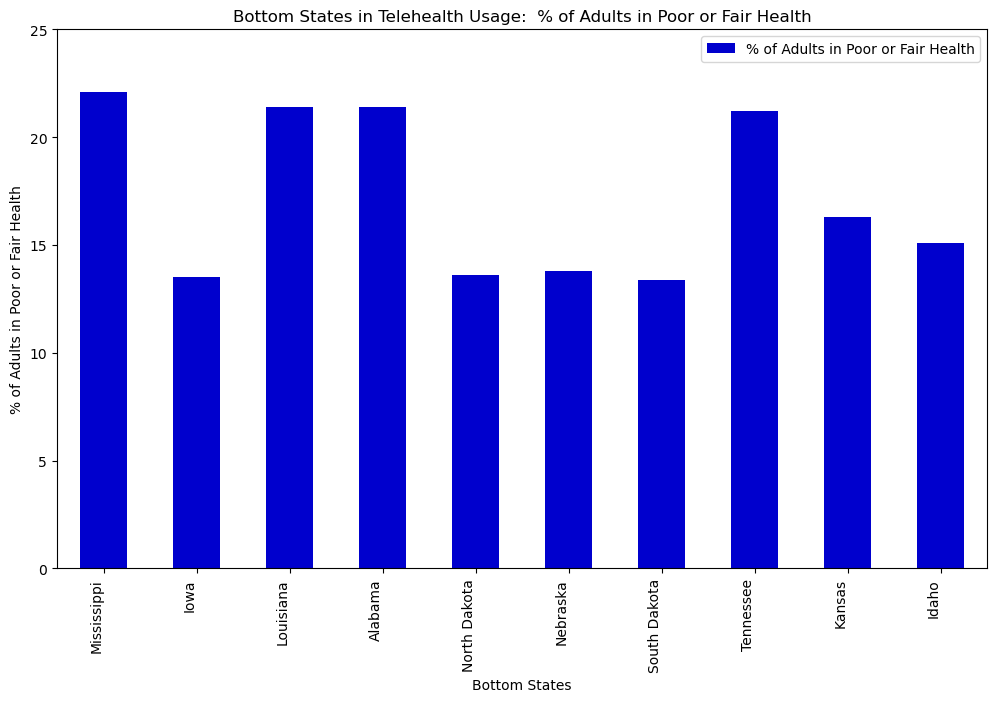

In [37]:
# Create a bar plot for the bottom 10 states
figure1, ax = plt.subplots(figsize=(12, 7))
bottom_103.plot(kind="bar", ax=ax, color=["mediumblue", "slateblue"])

# Set up titles and labels
title = "Bottom States in Telehealth Usage:  % of Adults in Poor or Fair Health"
xlabel = "Bottom States"
ylabel = "% of Adults in Poor or Fair Health"

# Configure x ticks
xticklabels = bottom_103.index
ax.set_xticklabels(xticklabels, rotation=90, ha="right")

# Set labels and title
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.set_title(title)

# Set y-axis limit to 25
ax.set_ylim(0, 25)

# Show the plot
plt.show()